In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [3]:
cd drive/Shareddrives/'DS340W Project'/PopularityPrediction-main

/content/drive/Shareddrives/DS340W Project/PopularityPrediction-main


In [4]:
df = pd.concat(
    map(pd.read_csv, ['INSTAGRAM FILES/merged_file_insta1.csv', 'FACEBOOK FILES/merged_file_final_fb1.csv']), ignore_index=True)
df = df.dropna()
print(df)

      Child  Smile  Female  Male  PeopleNumber  Text  close_up  Indoors  \
0         1      1       1     0             1     0         0        0   
1         0      1       1     1             2     0         0        0   
2         0      1       1     0             1     0         0        0   
3         1      1       1     0             1     0         0        0   
4         1      1       0     1             1     0         0        0   
...     ...    ...     ...   ...           ...   ...       ...      ...   
4119      1      1       1     1             2     0         0        0   
4120      0      0       0     0             0     1         0        0   
4121      0      1       1     1             2     0         0        0   
4122      1      1       0     1             2     0         0        0   
4123      0      1       1     1             2     1         0        0   

      Outdoors dominantColor  ...  Total Interactions  Contrast  ANGRY CALM  \
0            0      

In [5]:
def change_types(df):
    df['Followers at Posting'] = df['Followers at Posting'].astype('int64')
    df['Child'] = df['Child'].astype('int64')
    df['Smile'] = df['Smile'].astype('int64')
    df['Female'] = df['Female'].astype('int64')
    df['Male'] = df['Male'].astype('int64')
    df['PeopleNumber'] = df['PeopleNumber'].astype('int64')
    df['Text'] = df['Text'].astype('int64')
    df['close_up'] = df['close_up'].astype('int64')
    df['Indoors'] = df['Indoors'].astype('int64')
    df['Outdoors'] = df['Outdoors'].astype('int64')
    return df

In [6]:
df = change_types(df)

<ipython-input-5-eab20bf8e5f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Followers at Posting'] = df['Followers at Posting'].astype('int64')
<ipython-input-5-eab20bf8e5f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Child'] = df['Child'].astype('int64')
<ipython-input-5-eab20bf8e5f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [7]:
df.dtypes

,0
Child,int64
Smile,int64
Female,int64
Male,int64
PeopleNumber,int64
Text,int64
close_up,int64
Indoors,int64
Outdoors,int64
dominantColor,object


In [8]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,Followers at Posting,Total Interactions,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
count,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0
mean,0.4,0.8,0.7,0.4,1.2,0.3,0.0,0.1,0.1,0.6,6343522.6,50491.0,0.0,0.3,0.0,0.0,0.0,0.4,0.1,0.0
std,0.5,0.4,0.5,0.5,0.7,0.4,0.1,0.2,0.3,0.5,10134479.4,307310.0,0.1,0.5,0.1,0.1,0.2,0.5,0.3,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4740.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,87607.8,124.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,866633.0,387.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,8106419.2,10786.2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
max,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,29486754.0,5750308.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


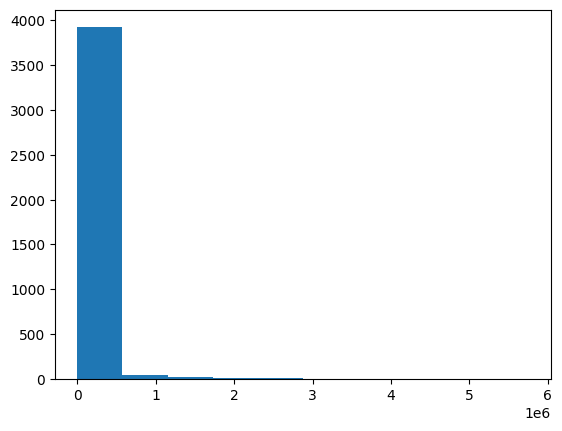

In [9]:
plt.hist(df['Total Interactions'], bins=10)
plt.show()

In [10]:
new_df = df[df['Total Interactions'] < df['Total Interactions'].quantile(0.90)]
# new_df = df[(df['Total Interactions'] < df['Total Interactions'].quantile(0.80)) & (df['Total Interactions'] > df['Total Interactions'].quantile(0.20))]
# plt.hist(new_df['Total Interactions'])

In [11]:
new_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,Followers at Posting,Total Interactions,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
count,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0
mean,0.4,0.8,0.7,0.4,1.2,0.3,0.0,0.1,0.1,0.6,4964171.1,3800.4,0.0,0.3,0.0,0.0,0.0,0.4,0.1,0.0
std,0.5,0.4,0.5,0.5,0.7,0.4,0.1,0.2,0.3,0.5,9188338.0,6522.2,0.1,0.5,0.1,0.1,0.2,0.5,0.3,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4740.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,77250.2,110.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,394945.0,301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,1995020.2,4012.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
max,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,29486754.0,25440.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [12]:
df[df['Total Interactions']>100000].count()

,0
Child,153
Smile,153
Female,153
Male,153
PeopleNumber,153
Text,153
close_up,153
Indoors,153
Outdoors,153
dominantColor,153


In [13]:
y = new_df['Total Interactions']
y = (y/new_df['Followers at Posting'])*1000
y

,0
0,4.593569
1,3.093195
2,3.393552
3,4.390779
4,5.781499
...,...
4119,1.760828
4120,1.379175
4121,1.055932
4122,0.856490


<ipython-input-14-8733ca3f5b98>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


,0
count,3618.000000
mean,2.396957
std,4.386693
min,0.004986
25%,0.407134
50%,1.432157
75%,2.865174
max,139.164638


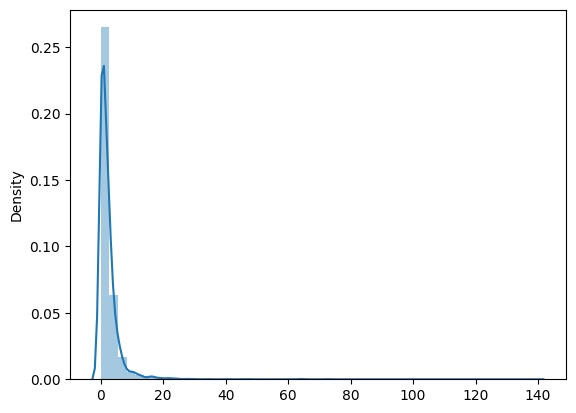

In [14]:
sns.distplot(y)
y.describe()

In [15]:
X = new_df.drop(['Total Interactions','Followers at Posting'], axis=1)
X

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,LOGO,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,1,1,1,0,1,0,0,0,0,cyan,1,HIGH,0,0,0,0,0,1,0,0
1,0,1,1,1,2,0,0,0,0,green,1,HIGH,0,0,0,0,0,1,0,0
2,0,1,1,0,1,0,0,0,0,grey,1,HIGH,0,1,0,0,0,0,0,0
3,1,1,1,0,1,0,0,0,1,grey,1,HIGH,0,1,0,0,0,0,0,0
4,1,1,0,1,1,0,0,0,0,cyan,1,HIGH,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,1,1,1,1,2,0,0,0,0,cyan,1,HIGH,0,1,0,0,0,1,0,0
4120,0,0,0,0,0,1,0,0,0,blue,1,LOW,0,0,0,0,0,0,0,0
4121,0,1,1,1,2,0,0,0,0,cyan,1,HIGH,0,1,0,0,0,0,0,0
4122,1,1,0,1,2,0,0,0,0,grey,1,HIGH,0,1,0,0,0,0,1,0


In [16]:
X = pd.get_dummies(data=X)
X.head()
print(X.columns)
X

Index(['Child', 'Smile', 'Female', 'Male', 'PeopleNumber', 'Text', 'close_up',
       'Indoors', 'Outdoors', 'LOGO', 'ANGRY', 'CALM', 'CONFUSED', 'DISGUSTED',
       'FEAR', 'HAPPY', 'SAD', 'SURPRISED', 'dominantColor_blue',
       'dominantColor_brown', 'dominantColor_cyan', 'dominantColor_green',
       'dominantColor_grey', 'dominantColor_orange', 'dominantColor_pink',
       'dominantColor_purple', 'dominantColor_red', 'dominantColor_white',
       'dominantColor_yellow', 'Contrast_HIGH', 'Contrast_LOW'],
      dtype='object')


,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,1,1,1,0,1,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
1,0,1,1,1,2,0,0,0,0,1,...,True,False,False,False,False,False,False,False,True,False
2,0,1,1,0,1,0,0,0,0,1,...,False,True,False,False,False,False,False,False,True,False
3,1,1,1,0,1,0,0,0,1,1,...,False,True,False,False,False,False,False,False,True,False
4,1,1,0,1,1,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,1,1,1,1,2,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
4120,0,0,0,0,0,1,0,0,0,1,...,False,False,False,False,False,False,False,False,False,True
4121,0,1,1,1,2,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
4122,1,1,0,1,2,0,0,0,0,1,...,False,True,False,False,False,False,False,False,True,False


In [17]:
# y = (y - y.min())/(y.max() - y.min())

In [18]:
def change_types(X):
    X['dominantColor_blue'] =X['dominantColor_blue'].astype('int64')
    X['dominantColor_brown'] =X['dominantColor_brown'].astype('int64')
    X['dominantColor_cyan'] =X['dominantColor_cyan'].astype('int64')
    X['dominantColor_green'] =X['dominantColor_green'].astype('int64')
    X['dominantColor_grey'] =X['dominantColor_grey'].astype('int64')
    X['dominantColor_orange'] =X['dominantColor_orange'].astype('int64')
    X['dominantColor_pink'] =X['dominantColor_pink'].astype('int64')
    X['dominantColor_purple'] =X['dominantColor_purple'].astype('int64')
    X['dominantColor_red'] =X['dominantColor_red'].astype('int64')
    X['dominantColor_white'] =X['dominantColor_white'].astype('int64')
    X['dominantColor_yellow'] =X['dominantColor_yellow'].astype('int64')
    X['Contrast_HIGH'] =X['Contrast_HIGH'].astype('int64')
    X['Contrast_LOW'] =X['Contrast_LOW'].astype('int64')
    return X

In [19]:
X = change_types(X)
X.dtypes

,0
Child,int64
Smile,int64
Female,int64
Male,int64
PeopleNumber,int64
Text,int64
close_up,int64
Indoors,int64
Outdoors,int64
LOGO,int64


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train) # Training
y_pred = rf_reg.predict(X_test) # The predicted y

In [22]:
print(metrics.mean_squared_error(y_test, y_pred))

print(metrics.median_absolute_error(y_test, y_pred))

print(metrics.mean_absolute_percentage_error(y_test, y_pred))

17.594066336879887
1.3623953004343172
3.7909198221399993


In [23]:
rf_reg.score(X_test, y_test)

-0.2760578606238644

In [24]:
for imp, name in zip(rf_reg.feature_importances_, rf_reg.feature_names_in_):
    print(name, imp)

Child 0.059605682605450266
Smile 0.028085971441710447
Female 0.034635827778316954
Male 0.04482677310646009
PeopleNumber 0.07526441606377893
Text 0.08374005150564043
close_up 0.01116570245379764
Indoors 0.01599246952461167
Outdoors 0.06095257180202665
LOGO 0.09450237471123309
ANGRY 0.009531024276048104
CALM 0.06017622390501811
CONFUSED 0.021799066208177648
DISGUSTED 0.0021228692983979547
FEAR 0.0433310547362229
HAPPY 0.07018779351520818
SAD 0.03742196094612376
SURPRISED 0.012185147574366591
dominantColor_blue 0.009393910042218312
dominantColor_brown 0.02998264313391982
dominantColor_cyan 0.02356437070715379
dominantColor_green 0.04698705287415792
dominantColor_grey 0.022764697382800392
dominantColor_orange 0.0008696698881752369
dominantColor_pink 0.0009425584234687253
dominantColor_purple 0.010987462003040193
dominantColor_red 0.007818255399606988
dominantColor_white 0.0007874302802382047
dominantColor_yellow 0.0073917088015003655
Contrast_HIGH 0.032331096356376494
Contrast_LOW 0.040652

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
model.score(X_test, y_test)

0.012945107144460177

## Balance dataset

In [27]:
def downsample(df:pd.DataFrame, label_col_name:str) -> pd.DataFrame:
    # find the number of observations in the smallest group
    nmin = df[label_col_name].value_counts().min()
    return (df
            # split the dataframe per group
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombine the dataframes
            .reset_index(drop=True)
            )

https://medium.com/strands-tech-corner/unbalanced-datasets-what-to-do-144e0552d9cd

In [28]:
X['Targets']=y

In [29]:
X = downsample(X, 'Targets')
y = X['Targets']

<ipython-input-27-bc8664726690>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(nmin))


In [30]:
X = X.drop('Targets', axis=1)

In [31]:
X.shape

(3610, 31)

In [32]:
X

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,1,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
4,0,1,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,1,1,1,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3606,1,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3607,1,1,0,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3608,1,1,1,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train) # Training
y_pred = rf_reg.predict(X_test) # The predicted y

In [35]:
rf_reg.score(X_test, y_test)

-0.4974759388231005

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
model.score(X_test, y_test)

0.027717208430858342

In [38]:
important_features = pd.Series(data=rf_reg.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features.astype(float)

,0
HAPPY,0.077102
Text,0.075605
PeopleNumber,0.070997
LOGO,0.066577
Outdoors,0.065386
CALM,0.057977
Contrast_LOW,0.056679
Child,0.054457
Male,0.050828
Smile,0.046399


In [39]:
predictions = model.predict(X_test)

<Axes: xlabel='Targets'>

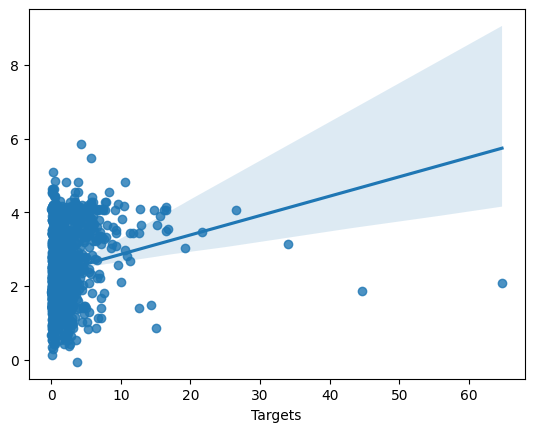

In [40]:
sns.regplot(x=y_test, y=predictions)